Sentiment Analysis on Kanye West and Donald Trump to see if there was an impact on Ye's tweets and Trump's popularity... 

In [1]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
consumer_key = '5snDy5NGYkLOMjbvyhbyPR4Qa'
consumer_secret = 'vwMHegxeYn57plCuROuRQI9KXuI9m1l6NBjrUIcW8wb9T35r1J'

access_token = '98916612-tiFFa7Be1MQQUXEqMLNJBSk7mcQpM3rfSxUbJBzph'
access_token_secret = 'AG7ziWD1JGkMDH4QyPAZGYxcRjraRvHbZspzT8sKKASyh'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
user = tweepy.API(auth)

In [3]:
#with this, I can create tweets, delete tweets, and find tweets

In [4]:
def topic_sentiment(word, num_tweets):
    tweetsent = [] #sentiment value of a tweet, individual val btw -1 and 1 
    # Checks if the sentiment for the given topic is
    # positive or negative, returns True if
    # majority of valid tweets have positive sentiment
    list_of_tweets = user.search(word, count=num_tweets)
    positive, null = 0, 0

    for tweet in list_of_tweets:
        #print(tweet.text)
        #print("")
        blob = TextBlob(tweet.text).sentiment
        if blob.subjectivity == 0:
            null += 1
            next
        if blob.polarity > 0:
            positive += 1
        print(tweet.text)
        print(blob.polarity)
        tweetsent.append(blob.polarity)
    if positive > ((num_tweets - null)/2):
        #if over half the tweets are considered positive polarity, this is good! 
        return True
        print("good")
    else:
        print("The overall  sentiment is not good!")
    return tweetsent

In [6]:
kanye_sentiment = topic_sentiment('Palestine',10000)

London stages multiple protests in solidarity with Palestine – Mondoweiss https://t.co/xDQq1iYxqn
0.0
@TheMendozaWoman @emjay505 #Palestine #USA #ApartheidIsrael #apartheid #Israel #zionism #US #imperialism… https://t.co/fkLAUQKLLM
0.0
@artstop @JewishNewsUK @geoffreyjewdas 2/ Jews from MENA. What would have prevented the ~45% Palestinian Arab minor… https://t.co/MkMrtd4b3d
0.0
RT @aa_french: Entretien téléphonique entre le président turc, Erdogan et le pape François au sujet des derniers développements en Palestin…
0.0
RT @ShaunBokhari: @AkshayaSays @nikkihaley @Palestine_UN Hopefully she stays out
0.0
@AkshayaSays @nikkihaley @Palestine_UN Ridiculous
-0.3333333333333333
@AkshayaSays @nikkihaley @Palestine_UN That picture sums up the Trump administration entirely.
0.0
@drmimranqureshi @hrw @UNHumanRights @IntlCrimCourt @amnesty @basemn63 @Indian4Palestin @firstqiblah @tshamsi88… https://t.co/pbg0bRG6ti
0.0
RT @The_NewArab: Palestine envoy to Washington recalled over Jerusalem embassy 

In [5]:
trump_sentiment = topic_sentiment('trump',10000)

RT @goldengateblond: If Ronny Jackson is run out of DC, I hope the last thing he yells from the moving car is Trump’s actual weight.
0.0
@MichaelAvenatti “When U have your staff taking the Fifth Amendment, taking the Fifth so they're not prosecuted, wh… https://t.co/lVI7nGbN75
0.0
RT @elijahdaniel: no. nope. no kanye jokes. this what happened last time and we all made trump president on accident. kim kardashian really…
0.0
@kanyewest And nothing will change under Trump. Nothing has changed under the last 44 president.  So why does Obama… https://t.co/baWgCizfPy
0.0
RT @TeamPelosi: Paul Ryan and Donald Trump want you to believe their trickle-down economics policies are phenomenal for workers. They’re no…
0.5
RT @TimHannan: Comey says Trump is morally unfit to be President. @RepPeteKing thinks Trump who sprays himself orange displays good judgmen…
0.35
RT @USseriously: Cambridge Analytica whistleblower Christopher Wylie told Democrats on Capitol Hill that former Trump campaign strategist

<IPython.core.display.Javascript object>


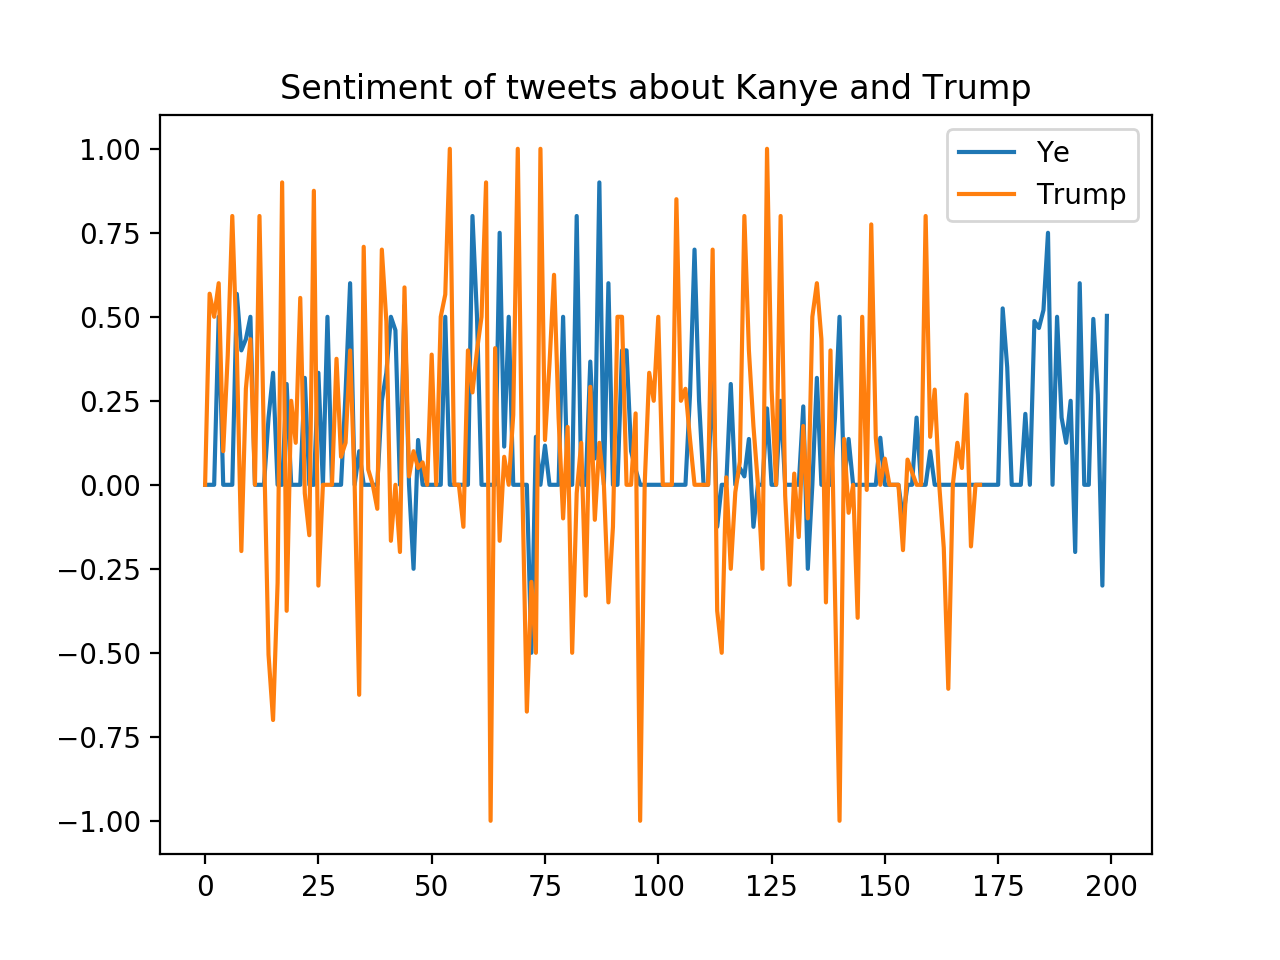

In [36]:
plt.plot(kanye, label ='Ye')
plt.plot(djt,label = 'Trump')
plt.title("Sentiment of tweets about Kanye and Trump")
plt.legend()

In [ ]:
plt.plot(trump_sentiment)
plt.title("Sentiment of tweets about Trump",label = 'Trump')

In [20]:
def user_sentiment(acct, num_tweets,easy=True):
    # Checks if the sentiment for the given twitter user is
    # positive or negative, returns True if
    # majority of valid tweets have positive sentiment
    list_of_tweets = user.user_timeline(screen_name = acct, count = num_tweets, include_rts = False)

    positive, null = 0, 0
    sentiment = []  #sentiment of individual tweets
    for tweet in list_of_tweets:
        print(tweet.text)
        #print("")
        blob = TextBlob(tweet.text).sentiment
        sentiment.append(blob.polarity)
    if easy:    
        return sentiment
    else:
        if blob.subjectivity == 0:
            null += 1
            next
        if blob.polarity > 0:
            positive += 1
    if positive > ((num_tweets - null)/2):
        #if over half the tweets are considered positive polarity, this is good! 
        return True
    else:
        return False


In [32]:
kanye = user_sentiment('kanyewest',num_tweets=200)
djt = user_sentiment('realdonaldtrump',num_tweets=200)

that's the last tweet of the day. I did that one for my god-brother Puff.  Now ima go watch the Cavs.
159 employees to go https://t.co/a0KEeWMLtt
https://t.co/tB8SlAjIfV
2 of my favorite people
caption this photo https://t.co/XjesMH9LMd
can't wait to meet https://t.co/i7ixzuFpZC
Obama was in office for eight years and nothing in Chicago changed.
Claudio will be awesome when me and Chance build new homes in Chicago
Claudio Silverstein is a free thinker
Love is the most powerful force in the universe
let's move in love not fear
https://t.co/WMufnBTw8q
https://t.co/qjjqHjTpNN
me hero https://t.co/IGdq4hInRz
And any fan of me wants Ye to be Ye even when they don't agree because I represent the fact that they can be themse… https://t.co/uxw3cXH2GU
whenever someone mentions the word "fan" to me it's super manipulative. It's like "don't do or say this because of… https://t.co/89qWyRvoGh
I want to see a tour with Nikki Minaj and Cardi B
I'd like to meet with Tim Cook. I got some ideas
I feel c

MAGA! https://t.co/jFf5ONASlv
Thank you Kanye, very cool! https://t.co/vRIC87M21X
Looking forward to my meeting with Tim Cook of Apple. We will be talking about many things, including how the U.S.… https://t.co/1gRfA4s5hl
.@FLOTUS did a spectacular job hosting the President of France @EmmanuelMacron and his wife Brigitte. Every detail… https://t.co/1eEkAVAgkl
Busy day planned.  Looking forward to watching President Macron of France address a Joint Session of Congress today… https://t.co/G8DnullYl5
Congratulations to Republican Debbie Lesko on her big win in the Special Election for Arizona House seat. Debbie wi… https://t.co/trwSb09q7l
Our two great republics are linked together by the timeless bonds of history, culture, and destiny. We are people w… https://t.co/pwvB5g3GaY
Today, @FLOTUS Melania and I were honored to welcome French President @EmmanuelMacron and Mrs. Brigitte Macron to t… https://t.co/8kwPVoGn8B
.@JimRenacci has worked so hard on Tax Reductions, Illegal Immigration, th

In [35]:
plt.plot(kanye)

In [ ]:
user.user_timeline('kanyewest')

In [ ]:

#how to do it with a person
stuff = user.user_timeline(screen_name = 'kanyewest', count =100, include_rts = True)


In [ ]:
for tweet in stuff:
    print(tweet.text)
    

In [ ]:
topic_sentiment('kanye')

In [ ]:
s.mean(polarities)

In [ ]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
 
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = '5snDy5NGYkLOMjbvyhbyPR4Qa'
        consumer_secret = 'vwMHegxeYn57plCuROuRQI9KXuI9m1l6NBjrUIcW8wb9T35r1J'

        access_token = '98916612-tiFFa7Be1MQQUXEqMLNJBSk7mcQpM3rfSxUbJBzph'
        access_token_secret = 'AG7ziWD1JGkMDH4QyPAZGYxcRjraRvHbZspzT8sKKASyh'

        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
 
    def main():
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(query = 'Kanye West', count = 200)
 
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} % ".format(100*len(tweets - ntweets - ptweets)/len(tweets)))
 
    # printing first 5 positive tweets
    print("Positive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
 
    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
        print(tweet['text'])
 
    if __name__ == "__main__":
    # calling main function
        main()
